#### 참고자료 : https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko

간단히 말해서, tf.keras.layers.TextVectorization은 단어 수준의 임베딩을 생성하는 반면에 BERT와 ELMo는 문맥을 고려하여 단어를 임베딩합니다. 따라서 문맥을 고려해야 하는 자연어 처리 작업에는 BERT나 ELMo를 사용하는 것이 더 적합할 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Duplicate key in file PosixPath('/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family         : NanumSquareOTFRegular, Malgun Gothic, AppleGothic, Arial')
2024-02-16 21:00:53.800111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 테스트

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 텍스트 데이터
texts = ["Hello, how are you?", "What is the weather today?"]

# 토크나이저 생성 및 텍스트에 맞게 적합
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# 단어 사전 확인
word_index = tokenizer.word_index
print(word_index)


{'hello': 1, 'how': 2, 'are': 3, 'you': 4, 'what': 5, 'is': 6, 'the': 7, 'weather': 8, 'today': 9}


### 데이터 가져오기

In [16]:
df = pd.read_csv("../dataset/240128_TripAdvisorHotelReviews/final_dataset_5B.csv")

In [17]:
df.head(3)

,Unnamed: 0,text,ratings
0,631117,everyone from alby who made the reservation to...,high
1,507002,I stayed here for 6 nights over two consecutiv...,high
2,256569,Perfect location for seeing the sights in Holl...,high


### fit_on_texts 처리해주기

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

# num_words 매개변수를 사용하여 최대 단어 수 지정
tokenizer = Tokenizer(num_words=10000)

# 텍스트에 맞게 적합
tokenizer.fit_on_texts(df['text'])


# 단어 사전 확인
word_index = tokenizer.word_index
print(word_index)


{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'was': 5, 'i': 6, 'in': 7, 'we': 8, 'of': 9, 'is': 10, 'for': 11, 'hotel': 12, 'it': 13, 'room': 14, 'that': 15, 'at': 16, 'but': 17, 'on': 18, 'this': 19, 'were': 20, 'not': 21, 'with': 22, 'you': 23, 'very': 24, 'had': 25, 'my': 26, 'there': 27, 'our': 28, 'have': 29, 'they': 30, 'are': 31, 'as': 32, 'from': 33, 'stay': 34, 'so': 35, 'be': 36, 'would': 37, 'all': 38, 'staff': 39, 'great': 40, 'if': 41, 'rooms': 42, 'one': 43, 'no': 44, 'out': 45, 'good': 46, 'when': 47, 'location': 48, 'nice': 49, 'night': 50, 'stayed': 51, 'an': 52, 'which': 53, 'us': 54, 'or': 55, 'up': 56, 'just': 57, 'clean': 58, 'get': 59, 'only': 60, 'service': 61, 'about': 62, 'me': 63, 'breakfast': 64, 'here': 65, 'desk': 66, 'time': 67, 'by': 68, 'like': 69, 'also': 70, 'did': 71, 'bed': 72, 'could': 73, 'front': 74, 'day': 75, 'again': 76, 'other': 77, 'place': 78, 'small': 79, 'some': 80, 'area': 81, 'well': 82, 'back': 83, 'really': 84, 'will': 85, 'after': 86, 'frien

In [20]:
# 텍스트 데이터를 정수 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(df['text'])


In [21]:
# 변환된 시퀀스 출력
print(len(sequences))

50000


In [22]:
labels = df['ratings'].replace({'high': 1, 'low': 0})
labels

0        1
1        1
2        1
3        1
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ratings, Length: 50000, dtype: int64

### Train_test_split 

In [23]:
from sklearn.model_selection import train_test_split

# PyTorch DataLoader로 사용할 데이터셋 클래스를 정의하고 데이터를 생성하는 작업이 필요

# 예시: X는 embedded_sequence, y는 refined_df['ratings']
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### 패딩처리

In [24]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  165.97277647058823
문장길이 최대 :  2545
문장길이 표준편차 :  139.13331934873506
pad_sequences maxlen :  444
전체 문장의 0.9577411764705882%가 maxlen 설정값 이내에 포함됩니다. 


In [39]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)


X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val,
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(35000, 444)


### 모델 설계

In [45]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160881 (628.44 KB)
Trainable params: 160881 (628.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

In [47]:
type(X_val[0])

numpy.ndarray

In [48]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [49]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
274/274 [==============================] - 59s 204ms/step - loss: 0.6911 - accuracy: 0.5208 - val_loss: 0.6888 - val_accuracy: 0.5220
Epoch 2/10
274/274 [==============================] - 51s 185ms/step - loss: 0.6872 - accuracy: 0.5236 - val_loss: 0.6861 - val_accuracy: 0.5231
Epoch 3/10
274/274 [==============================] - 48s 176ms/step - loss: 0.6641 - accuracy: 0.5935 - val_loss: 0.5900 - val_accuracy: 0.7232
Epoch 4/10
274/274 [==============================] - 47s 170ms/step - loss: 0.5852 - accuracy: 0.7206 - val_loss: 0.5583 - val_accuracy: 0.7425
Epoch 5/10
274/274 [==============================] - 47s 173ms/step - loss: 0.5366 - accuracy: 0.7737 - val_loss: 0.5267 - val_accuracy: 0.7772
Epoch 6/10
274/274 [==============================] - 46s 167ms/step - loss: 0.5124 - accuracy: 0.7913 - val_loss: 0.5220 - val_accuracy: 0.7835
Epoch 7/10
274/274 [==============================] - 44s 162ms/step - loss: 0.5337 - accuracy: 0.7766 - val_loss: 0.7652 - val_ac

In [50]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

235/235 - 7s - loss: 0.8098 - accuracy: 0.5075 - 7s/epoch - 31ms/step
[0.8098326921463013, 0.5074666738510132]


In [51]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

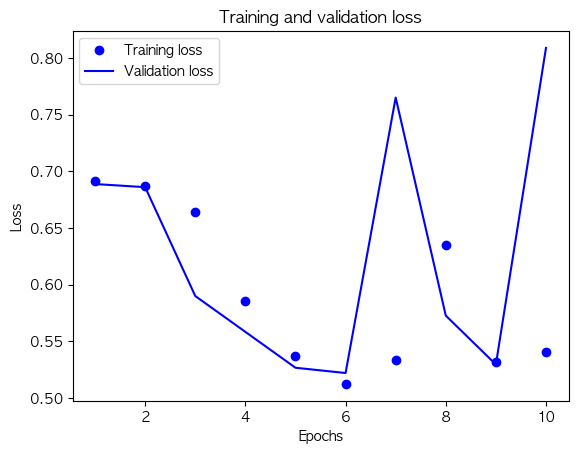

In [52]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

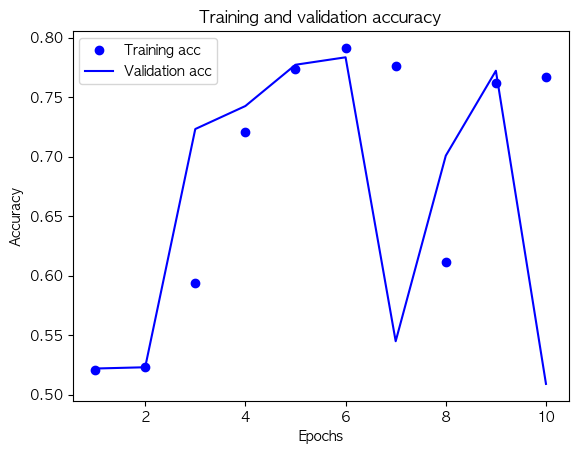

In [53]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()